In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df_radiacion = pd.read_csv('datos.csv', sep=",")
#df_radiacion = df_radiacion[df_radiacion['Fecha']=='2020-05-02']
#df_radiacion=df_radiacion.groupby('Hora', as_index=False)['Temperatura','Radiacion'].mean()
df_radiacion['Mes'] = pd.to_datetime(df_radiacion['Fecha'], format='%Y-%m-%d').dt.strftime('%m').astype('int')
#df_radiacion['Temperatura'] = df_radiacion['Temperatura'] - 273.15
df_radiacion.head(n=15)

,Fecha,Hora,Radiacion,Temperatura,Mes
0,2019-01-29,15,643.0,308.45,1
1,2019-01-29,15,622.0,308.15,1
2,2019-01-29,15,591.0,307.85,1
3,2019-01-29,15,591.0,307.65,1
4,2019-01-29,16,588.0,307.25,1
5,2019-01-29,16,554.0,307.45,1
6,2019-01-29,16,526.0,307.25,1
7,2019-01-29,16,510.0,307.15,1
8,2019-01-29,16,488.0,306.95,1
9,2019-01-29,16,471.0,306.85,1


[Text(0.5, 25.722222222222214, 'Time of the day'),
 Text(120.72222222222221, 0.5, 'Month')]

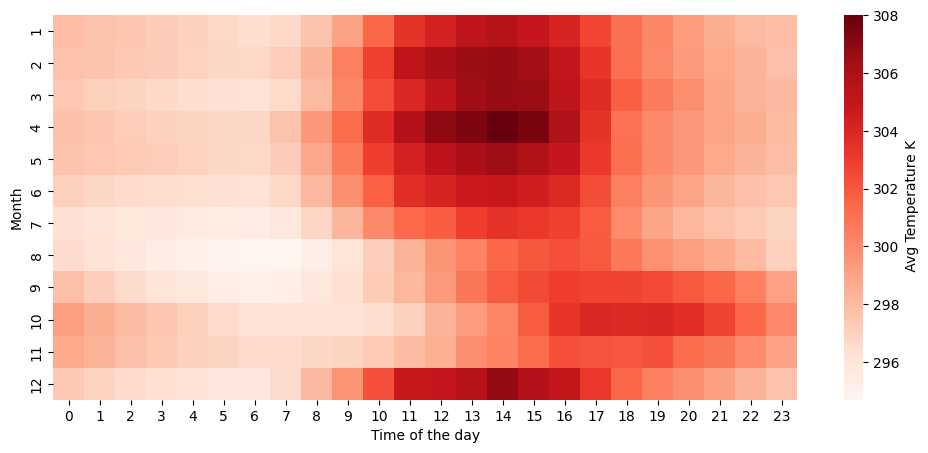

In [28]:
df_radiacion_agrupados = df_radiacion.groupby(['Mes','Hora'], as_index=False)[['Temperatura','Radiacion']].mean()
df_radiacion_pivot = df_radiacion_agrupados.pivot(index='Mes', columns='Hora', values='Temperatura')
df_radiacion_pivot.style.format()

fig, axes = plt.subplots(figsize=(12, 5))
sns.heatmap(data=df_radiacion_pivot, cmap = 'Reds', annot=False, cbar_kws={'label': ' Avg Temperature K'}).set(xlabel='Time of the day', ylabel='Month')

In [ ]:
import pickle
import requests
from datetime import datetime
from datetime import date
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

def getDataFromWheatherAPI():
    parameters = {'key': '',
             'place_id': 'quevedo',
              'timezone':'America/Guayaquil',
              'units':'metric',
              'sections':'current,hourly'}
    datos  = requests.get("https://www.meteosource.com/api/v1/free/point", parameters).json()
    datos_tiempo = pd.DataFrame(columns=['TemperaturaC', 'Temperatura', 'Hora', 'Fecha', 'Icon'])
    for datos_hora in datos['hourly']['data']:
        fecha=datetime.strptime(datos_hora['date'],'%Y-%m-%dT%H:%M:%S')
        datos_tiempo.loc[len(datos_tiempo)] = [datos_hora['temperature'],datos_hora['temperature'] + 273.15,
                             fecha.hour, fecha.strftime('%d %b - %H:%M'), './app/static/icons/%s.png' %datos_hora['icon']]
    return datos_tiempo

def predict(nombreModel, temperatura, hora):
    model = pickle.load(open(nombreModel, 'rb'))
    datos_tiempo = getDataFromWheatherAPI()
    X_test = datos_tiempo[['Temperatura','Hora']]
    y_pred = model.predict(X_test)
    datos_tiempo['Radiacion'] = y_pred
    return datos_tiempo

#predicciones = predict("GBR.model",0,0)
predicciones.style.format()

fig=plt.figure(figsize=(10,6))
#axe=sns.scatterplot(data= predicciones, x='Hora', y='Radiacion', hue='TemperaturaC', size = 'TemperaturaC', )
axe=sns.stripplot(data= predicciones, x='Hora', y='Radiacion', hue='TemperaturaC', s=10, order = predicciones['Hora'], palette='Reds')
plt.legend(title='Temperatura ºC', loc='upper left', bbox_to_anchor=(1, 1))
axe.set_title('Predicción de la Radiación las próximas 24 horas')
axe.set_ylabel('Radiación (W/m2)')
axe.set_xlabel('Hora del Día')

In [ ]:

import seaborn as sns
import pandas as pd
df_radiacion = pd.read_csv('datos.csv', sep=";")
#df_radiacion = df_radiacion[df_radiacion['Fecha']=='2020-05-02']
#df_radiacion=df_radiacion.groupby('Hora', as_index=False)['Temperatura','Radiacion'].mean()
df_radiacion['Mes'] = pd.to_datetime(df_radiacion['Fecha'], format='%Y-%m-%d').dt.strftime('%m').astype('int')
df_radiacion['Temperatura'] = df_radiacion['Temperatura'] - 273.15
df_radiacion.head(n=15)

,Fecha,Hora,Radiacion,Temperatura,Mes
0,2019-01-29,15,643.0,35.3,1
1,2019-01-29,15,622.0,35.0,1
2,2019-01-29,15,591.0,34.7,1
3,2019-01-29,15,591.0,34.5,1
4,2019-01-29,16,588.0,34.1,1
5,2019-01-29,16,554.0,34.3,1
6,2019-01-29,16,526.0,34.1,1
7,2019-01-29,16,510.0,34.0,1
8,2019-01-29,16,488.0,33.8,1
9,2019-01-29,16,471.0,33.7,1
